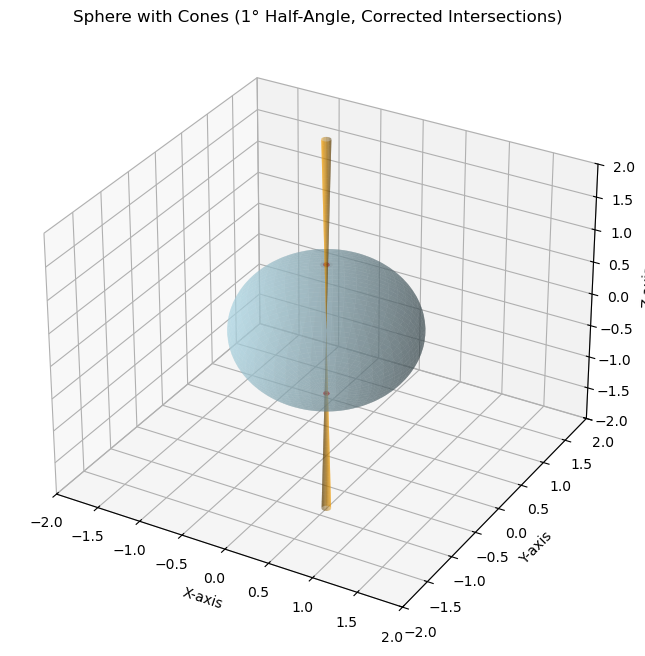

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to set equal scale for all axes
def set_axes_equal(ax):
    limits = np.array([
        ax.get_xlim(),
        ax.get_ylim(),
        ax.get_zlim()
    ])
    center = limits.mean(axis=1)
    max_range = (limits[:, 1] - limits[:, 0]).max() / 2

    for i, (ctr, lim) in enumerate(zip(center, limits)):
        limits[i] = [ctr - max_range, ctr + max_range]

    ax.set_xlim(limits[0])
    ax.set_ylim(limits[1])
    ax.set_zlim(limits[2])

# Create a sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones_like(u), np.cos(v))

# Define the cone angle (1 degree in radians)
theta_cone = np.radians(1)

# Define the cone grid
r = np.linspace(0, 0.05, 100)  # Extended to make sure it fully appears
phi = np.linspace(0, 2 * np.pi, 100)
x_cone = np.outer(r, np.cos(phi))
y_cone = np.outer(r, np.sin(phi))
z_cone_up = np.outer(r / np.tan(theta_cone), np.ones_like(phi))
z_cone_down = -z_cone_up  # Lower cone

# Correct intersection at radius = 1
r_intersection = np.sin(theta_cone)
z_intersection_fixed = np.cos(theta_cone)
t = np.linspace(0, 2 * np.pi, 100)
x_intersection_fixed = r_intersection * np.cos(t)
y_intersection_fixed = r_intersection * np.sin(t)
z_intersection_up_fixed = np.full_like(t, z_intersection_fixed)
z_intersection_down_fixed = -z_intersection_up_fixed

# Create figure and 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot sphere
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='lightblue', alpha=0.5)

# Plot cones
ax.plot_surface(x_cone, y_cone, z_cone_up, color='orange', alpha=0.5, rstride=5, cstride=5)
ax.plot_surface(x_cone, y_cone, z_cone_down, color='orange', alpha=0.5, rstride=5, cstride=5)

# Plot intersection circles
ax.plot(x_intersection_fixed, y_intersection_fixed, z_intersection_up_fixed, color='red', linewidth=2)
ax.plot(x_intersection_fixed, y_intersection_fixed, z_intersection_down_fixed, color='red', linewidth=2)

# Set fixed axis limits
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

# Ensure equal aspect ratio
set_axes_equal(ax)

# Labels and title
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("Sphere with Cones (1° Half-Angle, Corrected Intersections)")

plt.show()



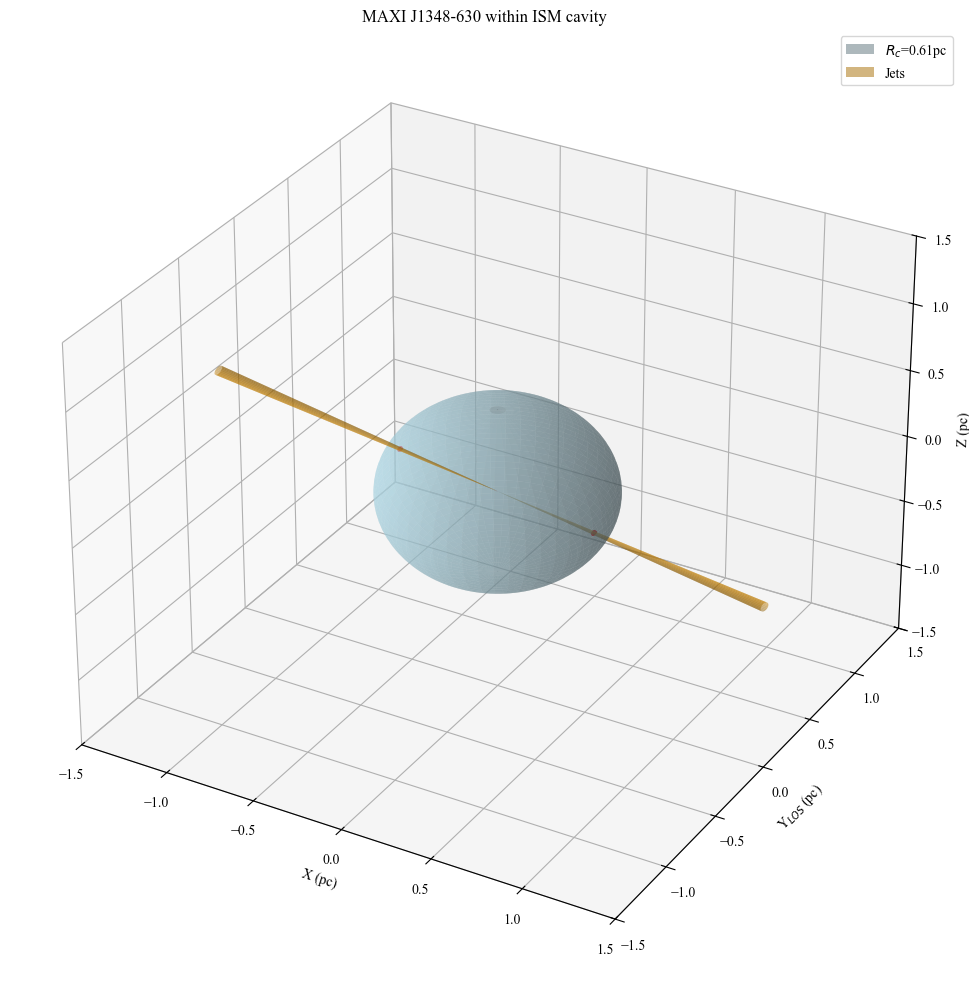

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["font.family"] = "Times New Roman"

# Function to set equal scale for all axes
def set_axes_equal(ax):
    limits = np.array([
        ax.get_xlim(),
        ax.get_ylim(),
        ax.get_zlim()
    ])
    center = limits.mean(axis=1)
    max_range = (limits[:, 1] - limits[:, 0]).max() / 2

    for i, (ctr, lim) in enumerate(zip(center, limits)):
        limits[i] = [ctr - max_range, ctr + max_range]

    ax.set_xlim(limits[0])
    ax.set_ylim(limits[1])
    ax.set_zlim(limits[2])

# Rotation matrices
def rotate_x(angle, x, y, z):
    """Rotate points around the x-axis by the given angle."""
    cos_a, sin_a = np.cos(angle), np.sin(angle)
    y_new = cos_a * y - sin_a * z
    z_new = sin_a * y + cos_a * z
    return x, y_new, z_new

def rotate_y(angle, x, y, z):
    """Rotate points around the y-axis by the given angle."""
    cos_a, sin_a = np.cos(angle), np.sin(angle)
    x_new = cos_a * x + sin_a * z
    z_new = -sin_a * x + cos_a * z
    return x_new, y, z_new

# Create a sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)
r_sphere = 0.61
x_sphere = r_sphere*np.outer(np.cos(u), np.sin(v))
y_sphere = r_sphere*np.outer(np.sin(u), np.sin(v))
z_sphere = r_sphere*np.outer(np.ones_like(u), np.cos(v))

# Define the cone angle (1 degree in radians)
theta_cone = np.radians(1)

# Define the cone grid
r = np.linspace(0, 0.03, 100)  # Small radius to ensure narrow cone
phi = np.linspace(0, 2 * np.pi, 100)
x_cone = np.outer(r, np.cos(phi))
y_cone = np.outer(r, np.sin(phi))
z_cone_up = np.outer(r / np.tan(theta_cone), np.ones_like(phi))
z_cone_down = -z_cone_up  # Lower cone

# Correct intersection at radius = 1
r_intersection = r_sphere*np.sin(theta_cone)
z_intersection_fixed = r_sphere*np.cos(theta_cone)
t = np.linspace(0, 2 * np.pi, 100)
x_intersection_fixed = r_intersection * np.cos(t)
y_intersection_fixed = r_intersection * np.sin(t)
z_intersection_up_fixed = np.full_like(t, z_intersection_fixed)
z_intersection_down_fixed = -z_intersection_up_fixed

# Define rotation angles
angle_x = np.radians(29.7)  # Rotation around x-axis
angle_y = np.radians(-45)    # Rotation around y-axis

# Apply rotations to the cones
x_cone_rot, y_cone_rot, z_cone_rot = rotate_x(angle_x, x_cone, y_cone, z_cone_up)
x_cone_rot, y_cone_rot, z_cone_rot = rotate_y(angle_y, x_cone_rot, y_cone_rot, z_cone_rot)

x_cone_rot_down, y_cone_rot_down, z_cone_rot_down = rotate_x(angle_x, x_cone, y_cone, z_cone_down)
x_cone_rot_down, y_cone_rot_down, z_cone_rot_down = rotate_y(angle_y, x_cone_rot_down, y_cone_rot_down, z_cone_rot_down)

# Apply rotations to the intersection circles
x_intersection_rot, y_intersection_rot, z_intersection_rot = rotate_x(angle_x, x_intersection_fixed, y_intersection_fixed, z_intersection_up_fixed)
x_intersection_rot, y_intersection_rot, z_intersection_rot = rotate_y(angle_y, x_intersection_rot, y_intersection_rot, z_intersection_rot)

x_intersection_rot_down, y_intersection_rot_down, z_intersection_rot_down = rotate_x(angle_x, x_intersection_fixed, y_intersection_fixed, z_intersection_down_fixed)
x_intersection_rot_down, y_intersection_rot_down, z_intersection_rot_down = rotate_y(angle_y, x_intersection_rot_down, y_intersection_rot_down, z_intersection_rot_down)

# Create figure and 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot sphere
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='lightblue', alpha=0.5, label='$R_c$=0.61pc')

# Plot rotated cones
ax.plot_surface(x_cone_rot, y_cone_rot, z_cone_rot, color='orange', alpha=0.5, rstride=5, cstride=5, label='Jets')
ax.plot_surface(x_cone_rot_down, y_cone_rot_down, z_cone_rot_down, color='orange', alpha=0.5, rstride=5, cstride=5)

# Plot rotated intersection circles
ax.plot(x_intersection_rot, y_intersection_rot, z_intersection_rot, color='red', linewidth=2)
ax.plot(x_intersection_rot_down, y_intersection_rot_down, z_intersection_rot_down, color='red', linewidth=2)

# Set fixed axis limits
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])

# Ensure equal aspect ratio
set_axes_equal(ax)

# Labels and title
ax.set_xlabel("X (pc)")
ax.set_ylabel("Y$_{LOS}$ (pc)")
ax.set_zlabel("Z (pc)")
ax.set_title("MAXI J1348-630 within ISM cavity")
ax.legend()

plt.tight_layout()
plt.show()

fig.savefig("MAXIJ1348sketch.pdf", format="pdf", bbox_inches="tight", dpi=300, transparent=True)



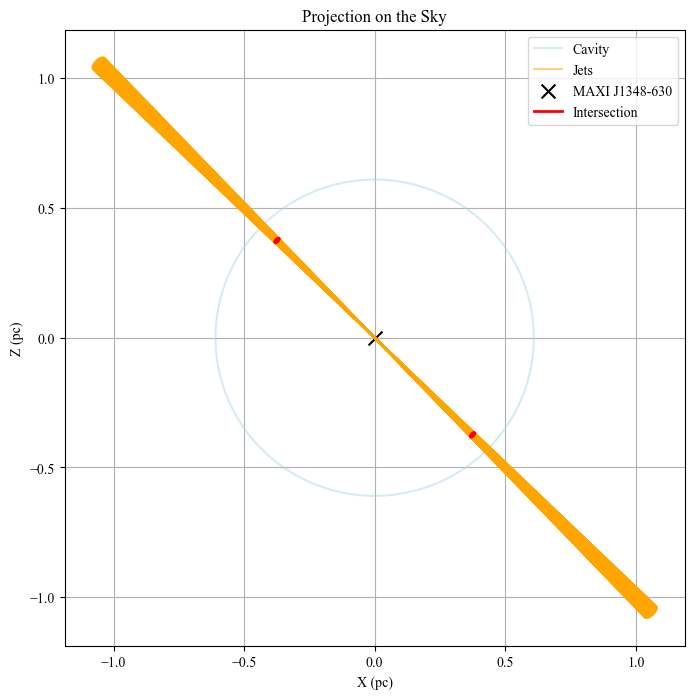

In [3]:
# Create figure for projection on XZ plane
fig_proj, ax_proj = plt.subplots(figsize=(8, 8))

# Compute middle index
middle_idx = z_sphere.shape[1] // 2  # Ensures valid index

# Plot sphere projection
ax_proj.plot(y_sphere[:, middle_idx], x_sphere[:, middle_idx], color='lightblue', alpha=0.5, label='Cavity')

# Plot rotated cones projection
ax_proj.plot(x_cone_rot[:, :], z_cone_rot[:, :], color='orange', alpha=0.5)
ax_proj.plot(x_cone_rot[:, middle_idx], z_cone_rot[:, middle_idx], color='orange', alpha=0.5, label='Jets')
ax_proj.plot(x_cone_rot_down[:, :], z_cone_rot_down[:, :], color='orange', alpha=0.5)
ax_proj.scatter(0, 0, color='black', marker='x', s=100, label="MAXI J1348-630")


# Plot intersection circles projection
ax_proj.plot(x_intersection_rot, z_intersection_rot, color='red', linewidth=2, label='Intersection')
ax_proj.plot(x_intersection_rot_down, z_intersection_rot_down, color='red', linewidth=2)

# Labels and title
ax_proj.set_xlabel("X (pc)")
ax_proj.set_ylabel("Z (pc)")
ax_proj.set_title("Projection on the Sky")
ax_proj.legend()

plt.grid()
plt.show()

fig_proj.savefig("MAXIJ1348_XZ_projection.pdf", format="pdf", bbox_inches="tight", dpi=300, transparent=True)


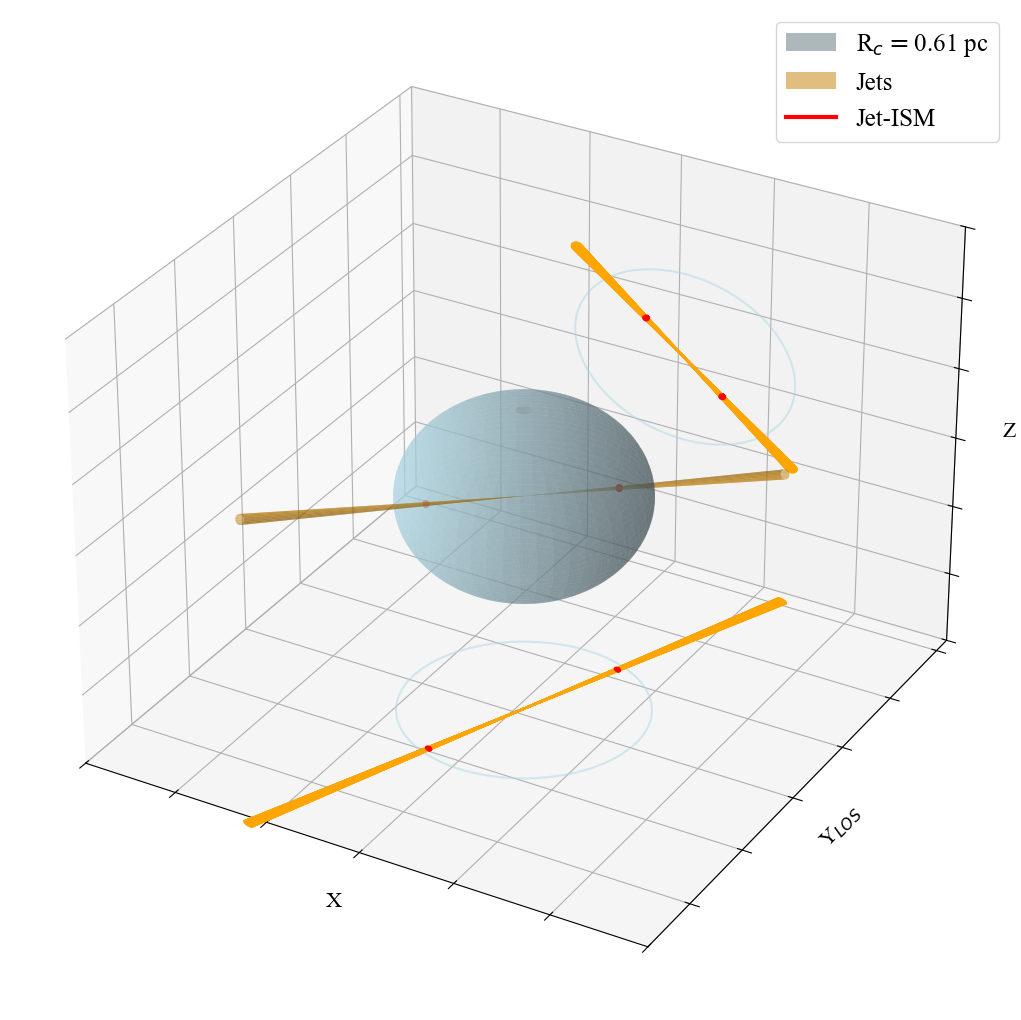

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["font.family"] = "Times New Roman"

# Function to set equal scale for all axes
def set_axes_equal(ax):
    limits = np.array([
        ax.get_xlim(),
        ax.get_ylim(),
        ax.get_zlim()
    ])
    center = limits.mean(axis=1)
    max_range = (limits[:, 1] - limits[:, 0]).max() / 2

    for i, (ctr, lim) in enumerate(zip(center, limits)):
        limits[i] = [ctr - max_range, ctr + max_range]

    ax.set_xlim(limits[0])
    ax.set_ylim(limits[1])
    ax.set_zlim(limits[2])

# Rotation matrices
def rotate_x(angle, x, y, z):
    cos_a, sin_a = np.cos(angle), np.sin(angle)
    y_new = cos_a * y - sin_a * z
    z_new = sin_a * y + cos_a * z
    return x, y_new, z_new

def rotate_y(angle, x, y, z):
    cos_a, sin_a = np.cos(angle), np.sin(angle)
    x_new = cos_a * x + sin_a * z
    z_new = -sin_a * x + cos_a * z
    return x_new, y, z_new

# Create a sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)
r_sphere = 0.61
x_sphere = r_sphere * np.outer(np.cos(u), np.sin(v))
y_sphere = r_sphere * np.outer(np.sin(u), np.sin(v))
z_sphere = r_sphere * np.outer(np.ones_like(u), np.cos(v))

# Define the cone angle (1 degree in radians)
theta_cone = np.radians(1)

# Define the cone grid
r = np.linspace(0, 0.03, 100)  
phi = np.linspace(0, 2 * np.pi, 100)
x_cone = np.outer(r, np.cos(phi))
y_cone = np.outer(r, np.sin(phi))
z_cone_up = np.outer(r / np.tan(theta_cone), np.ones_like(phi))
z_cone_down = -z_cone_up  

# Correct intersection at radius = r_sphere
r_intersection = r_sphere * np.sin(theta_cone)
z_intersection_fixed = r_sphere * np.cos(theta_cone)
t = np.linspace(0, 2 * np.pi, 100)
x_intersection_fixed = r_intersection * np.cos(t)
y_intersection_fixed = r_intersection * np.sin(t)
z_intersection_up_fixed = np.full_like(t, z_intersection_fixed)
z_intersection_down_fixed = -z_intersection_up_fixed

# Define rotation angles
angle_x = np.radians(90-29.7)  
angle_y = np.radians(-45)    

# Apply rotations to the cones
x_cone_rot, y_cone_rot, z_cone_rot = rotate_x(angle_x, x_cone, y_cone, z_cone_up)
x_cone_rot, y_cone_rot, z_cone_rot = rotate_y(angle_y, x_cone_rot, y_cone_rot, z_cone_rot)

x_cone_rot_down, y_cone_rot_down, z_cone_rot_down = rotate_x(angle_x, x_cone, y_cone, z_cone_down)
x_cone_rot_down, y_cone_rot_down, z_cone_rot_down = rotate_y(angle_y, x_cone_rot_down, y_cone_rot_down, z_cone_rot_down)

# Apply rotations to the intersection circles
x_intersection_rot, y_intersection_rot, z_intersection_rot = rotate_x(angle_x, x_intersection_fixed, y_intersection_fixed, z_intersection_up_fixed)
x_intersection_rot, y_intersection_rot, z_intersection_rot = rotate_y(angle_y, x_intersection_rot, y_intersection_rot, z_intersection_rot)

x_intersection_rot_down, y_intersection_rot_down, z_intersection_rot_down = rotate_x(angle_x, x_intersection_fixed, y_intersection_fixed, z_intersection_down_fixed)
x_intersection_rot_down, y_intersection_rot_down, z_intersection_rot_down = rotate_y(angle_y, x_intersection_rot_down, y_intersection_rot_down, z_intersection_rot_down)

# Create figure and 3D plot
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')

# Plot sphere
ax.plot_surface(x_sphere, y_sphere+r_sphere, z_sphere, color='lightblue', alpha=0.5, label='R$_c=$0.61 pc')

# Plot rotated cones
ax.plot_surface(x_cone_rot, y_cone_rot+r_sphere, z_cone_rot, color='orange', alpha=0.5, rstride=5, cstride=5, label='Jets')
ax.plot_surface(x_cone_rot_down, y_cone_rot_down+r_sphere, z_cone_rot_down, color='orange', alpha=0.5, rstride=5, cstride=5)

# Plot rotated intersection circles
ax.plot(x_intersection_rot, y_intersection_rot+r_sphere, z_intersection_rot, color='red', linewidth=3)
ax.plot(x_intersection_rot_down, y_intersection_rot_down+r_sphere, z_intersection_rot_down, color='red', linewidth=3, label='Jet-ISM')

# Set fixed axis limits
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5+r_sphere, 1.5+r_sphere])
ax.set_zlim([-1.5, 1.5])

# Ensure equal aspect ratio
set_axes_equal(ax)

# Labels and title
ax.set_xlabel("X ", fontsize=16)
ax.set_ylabel("Y$_{LOS}$ ",fontsize=16)
ax.set_zlabel("Z ",fontsize=16)
#ax.set_title("MAXI J1348-630 within ISM cavity")
ax.legend(fontsize=18)
ax.set_xticklabels([])  # Remove x-axis labels
ax.set_yticklabels([])  # Remove y-axis labels
ax.set_zticklabels([])  # Remove z-axis labels


# XZ Projection at the back (Y=1.5)
y_proj = 1.56+r_sphere  



ax.plot(y_sphere[:, z_sphere.shape[1] // 2], [y_proj] * x_sphere.shape[0], x_sphere[:, z_sphere.shape[1] // 2], 
        color='lightblue', alpha=0.5, linestyle='solid')
#ax.plot(y_sphere[:, middle_idx], x_sphere[:, middle_idx], color='lightblue', alpha=0.5, label='Cavity')

for val in range(0,100):
    ax.plot(x_cone_rot[:, val], [y_proj] * x_cone_rot.shape[0], z_cone_rot[:, val], 
            color='orange', alpha=0.5, linestyle='solid')

    ax.plot(x_cone_rot_down[:, val], [y_proj] * x_cone_rot_down.shape[0], z_cone_rot_down[:, val], 
            color='orange', alpha=0.5, linestyle='solid')

ax.plot(x_intersection_rot, [y_proj] * x_intersection_rot.shape[0], z_intersection_rot, 
        color='red', linewidth=3, linestyle='solid')

ax.plot(x_intersection_rot_down, [y_proj] * x_intersection_rot_down.shape[0], z_intersection_rot_down, 
        color='red', linewidth=3, linestyle='solid')

# XY Projection at the back (Y=-1.5)
z_proj = -1.56  

ax.plot(x_sphere[:, x_sphere.shape[1] // 2], y_sphere[:, y_sphere.shape[1]//2]+r_sphere, [z_proj]*z_sphere.shape[0], 
        color='lightblue', alpha=0.5, linestyle='solid')
#ax.plot(y_sphere[:, middle_idx], x_sphere[:, middle_idx], color='lightblue', alpha=0.5, label='Cavity')

for val1 in range(0,100):
    ax.plot(x_cone_rot[:, val1], y_cone_rot[:, val1]+r_sphere,  [z_proj] * z_cone_rot.shape[0],
            color='orange', alpha=0.5, linestyle='solid')

    ax.plot(x_cone_rot_down[:, val1], y_cone_rot_down[:, val1]+r_sphere, [z_proj] * z_cone_rot_down.shape[0],  
            color='orange', alpha=0.5, linestyle='solid')

ax.plot(x_intersection_rot, y_intersection_rot+r_sphere, [z_proj] * z_intersection_rot.shape[0], 
        color='red', linewidth=3, linestyle='solid')

ax.plot(x_intersection_rot_down, y_intersection_rot_down+r_sphere, [z_proj] * x_intersection_rot_down.shape[0], 
        color='red', linewidth=3, linestyle='solid', label='jet-ISM interaction site')

#plt.tight_layout()
plt.show()

fig.savefig("MAXIJ1348sketchproj.pdf", format="pdf", bbox_inches="tight", dpi=300, transparent=True)
